# Lesson 4 Homework

### By: Maksym Lushpak

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
claims = pd.read_csv('Car_Insurance_Claim.csv')
claims = claims.drop(claims.columns[0:1], axis=1)
claims = claims.drop('ID', axis=1)
claims = claims.drop('CREDIT_SCORE', axis=1)

for col_name in claims.columns:
    if col_name not in ['EDUCATION']:
        claims[col_name] = claims[col_name].apply(lambda v: np.nan if v == 'none' or v == '' else v)

for col_name in ['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']:
    claims[col_name] = pd.to_numeric(claims[col_name], errors='coerce')

claims['POSTAL_CODE'] = claims['POSTAL_CODE'].apply(lambda x: str(int(float(x))) if str(x) != 'nan' else x)

claims.head(10)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0.0,0.0,0.0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0.0,0.0,0.0,1.0
2,16-25,female,majority,0-9y,high school,working class,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0.0,0.0,0.0,0.0
3,16-25,male,majority,0-9y,university,working class,1.0,before 2015,0.0,NaN,32765,11000.0,sedan,0.0,0.0,0.0,0.0
4,26-39,male,majority,10-19y,none,working class,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2.0,0.0,1.0,1.0
5,40-64,female,majority,20-29y,high school,upper class,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3.0,0.0,3.0,0.0
6,65+,male,majority,30y+,high school,upper class,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7.0,0.0,3.0,0.0
7,26-39,female,majority,0-9y,university,working class,0.0,after 2015,0.0,1.0,10238,14000.0,sedan,0.0,0.0,0.0,1.0
8,40-64,female,majority,20-29y,university,working class,0.0,before 2015,1.0,0.0,10238,13000.0,sedan,0.0,0.0,0.0,0.0
9,40-64,female,majority,0-9y,NaN,upper class,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0.0,0.0,0.0,1.0


In [149]:
columns_with_unique_values = {
    'AGE': ['16-25', '26-39', '40-64', '65+'],
    'GENDER': ['male', 'female'],
    'RACE': ['majority', 'minority'],
    'DRIVING_EXPERIENCE': ['0-9y', '10-19y', '20-29y', '30y+'],
    'EDUCATION': ['none', 'high school', 'university'],
    'INCOME': ['poverty', 'working class', 'middle class', 'upper class'],
    'VEHICLE_YEAR': ['before 2015', 'after 2015'],
    'VEHICLE_TYPE': ['sedan', 'sports car'],
    'POSTAL_CODE': sorted([p for p in claims['POSTAL_CODE'].unique().tolist() if str(p) != 'nan'])
}

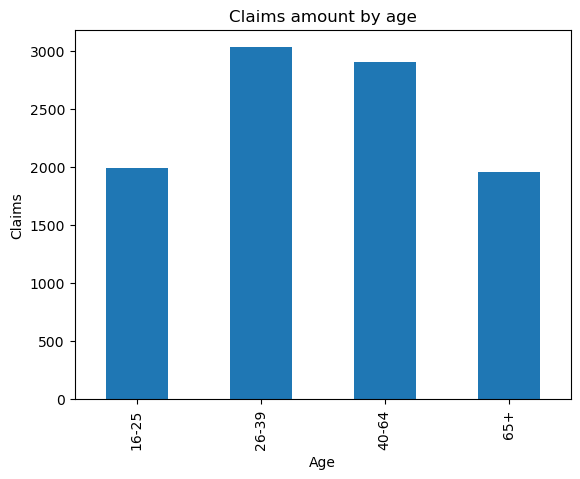

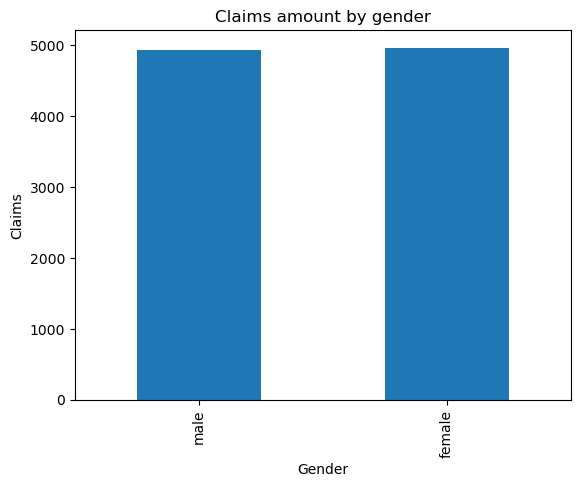

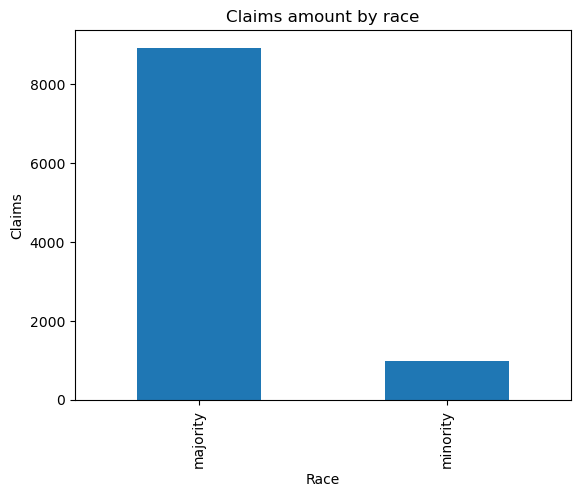

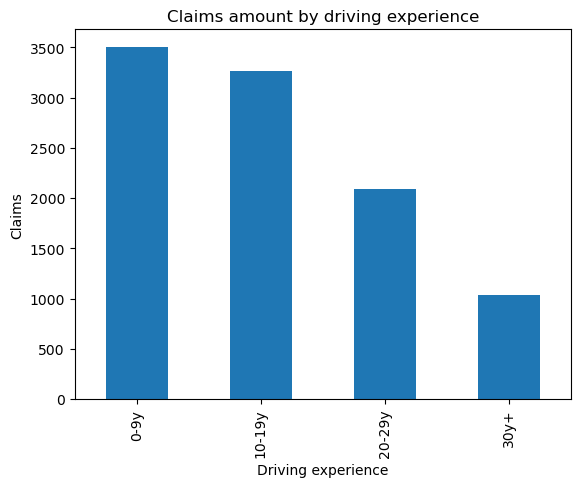

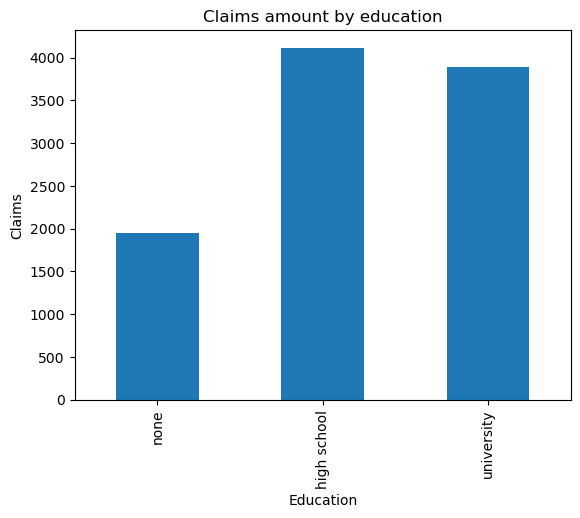

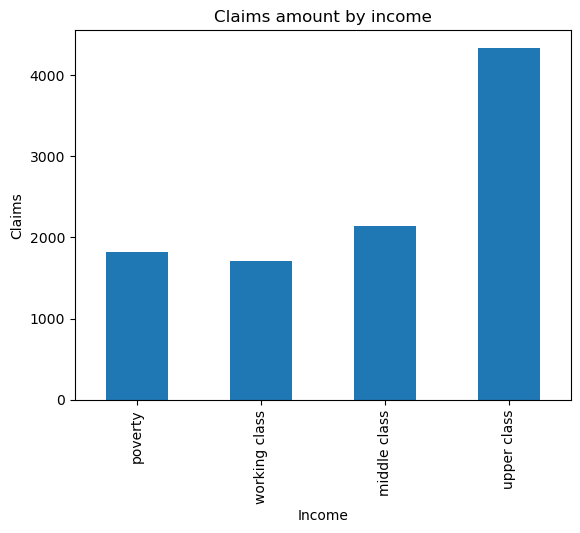

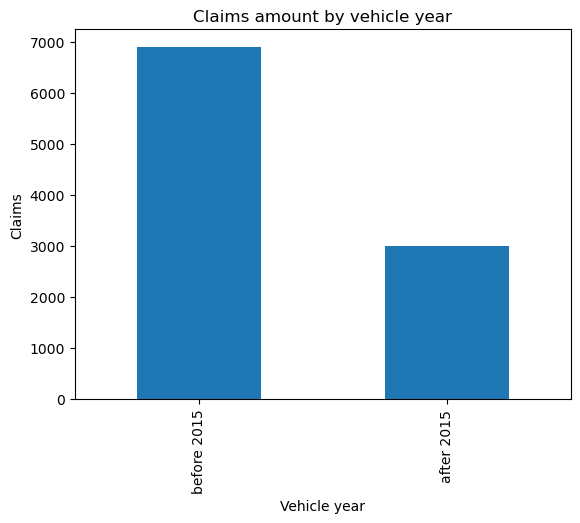

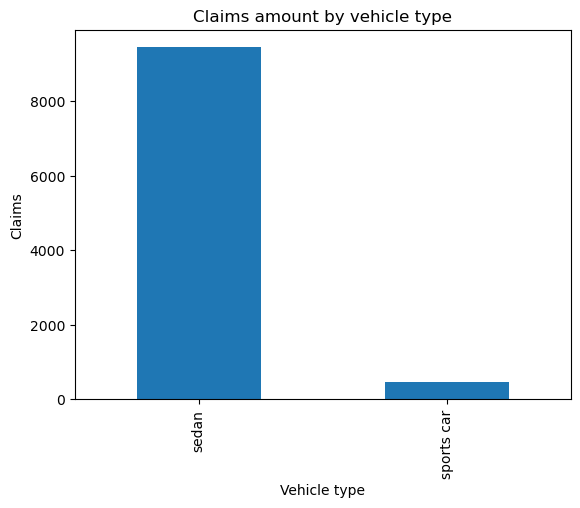

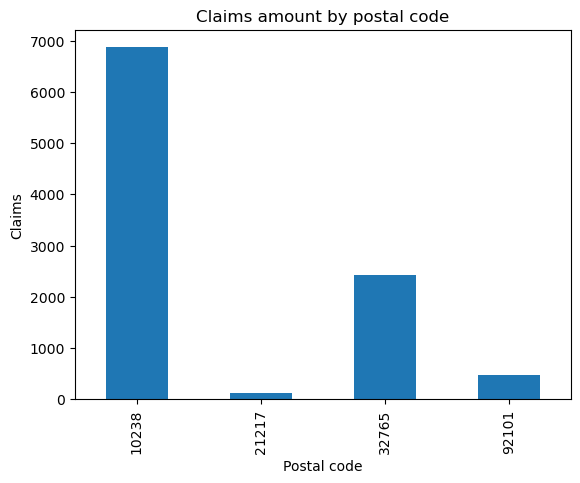

In [150]:
for col in columns_with_unique_values.keys():
    plt.figure()
    col_title = ' '.join(col.lower().split('_'))
    sorted_series = claims[col].value_counts().reindex(columns_with_unique_values[col])
    sorted_series.plot(kind='bar', title=f'Claims amount by {col_title}', xlabel=col_title.capitalize(), ylabel='Claims')
    plt.show()

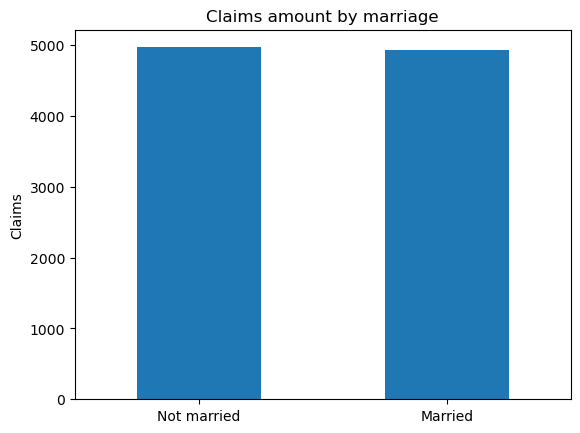

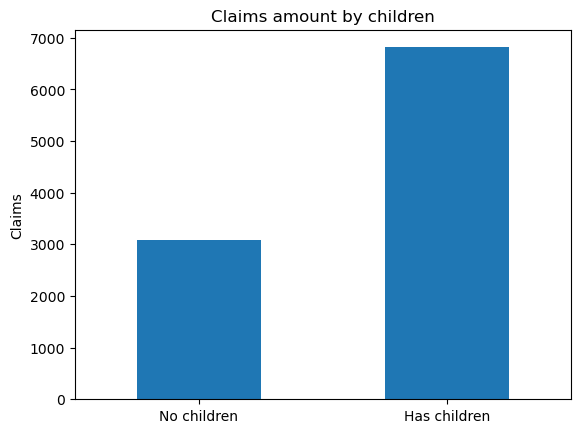

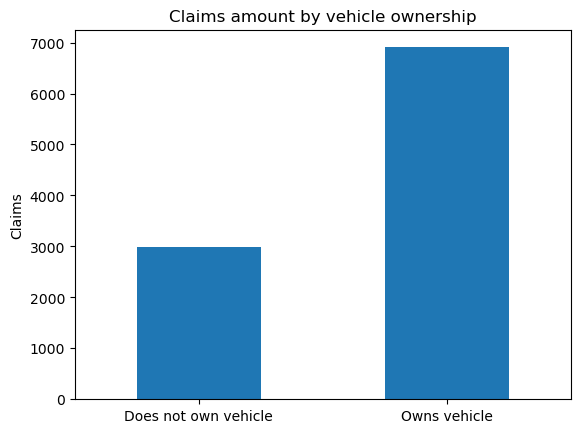

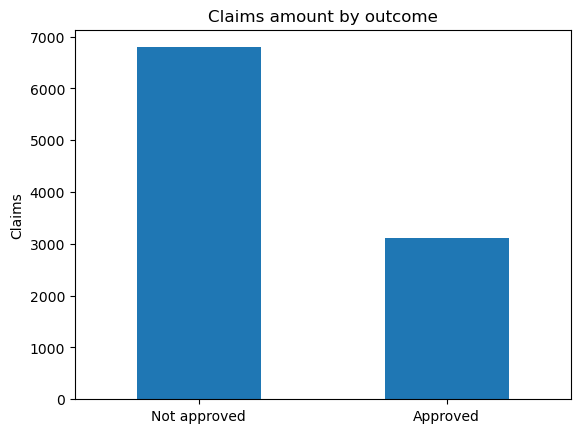

In [151]:
boolean_columns = {
    'MARRIED': {'title': 'marriage', 0: 'Not married', 1: 'Married'},
    'CHILDREN': {'title': 'children', 0: 'No children', 1: 'Has children'},
    'VEHICLE_OWNERSHIP': {'title': 'vehicle ownership', 0: 'Does not own vehicle', 1: 'Owns vehicle'},
    'OUTCOME': {'title': 'outcome', 0: 'Not approved', 1: 'Approved'}
}

for col_name in boolean_columns.keys():
    plt.figure()
    series = claims[col_name].value_counts().sort_index().rename(lambda x: boolean_columns[col_name][int(float(x))])
    fig = series.plot(kind='bar', title=f'Claims amount by {boolean_columns[col_name]["title"]}', xlabel='', ylabel='Claims')
    fig.set_xticklabels(series.index, rotation=0)
    plt.show()

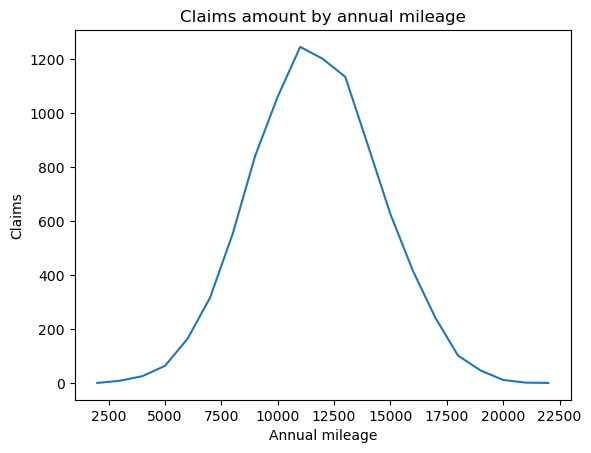

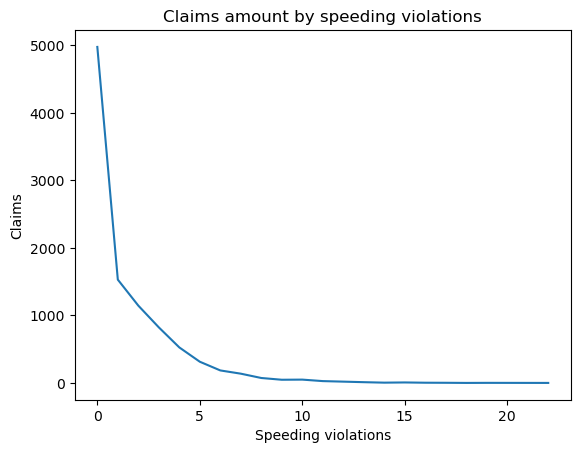

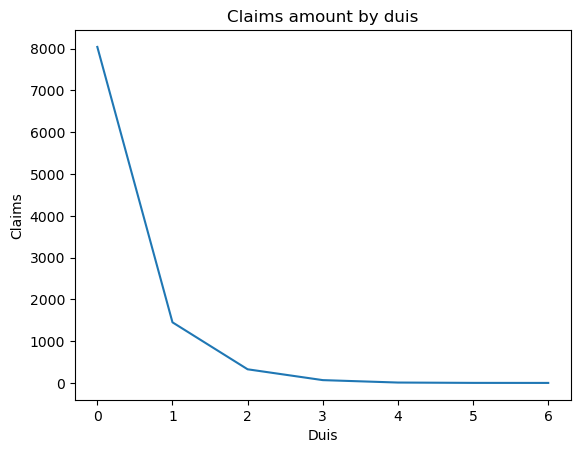

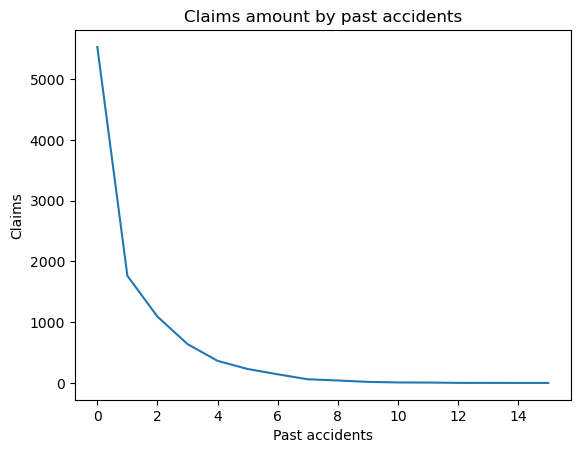

In [152]:
for col_name in claims.columns:
    if col_name in columns_with_unique_values.keys() or col_name in boolean_columns.keys():
        continue
    col_title = " ".join(col_name.lower().split('_'))
    plt.figure()
    claims[col_name].value_counts().sort_index().plot(title=f'Claims amount by {col_title}', xlabel=col_title.capitalize(), ylabel='Claims')
    plt.show()

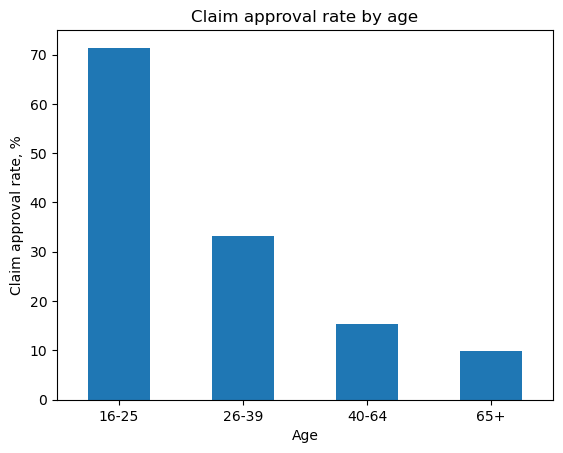

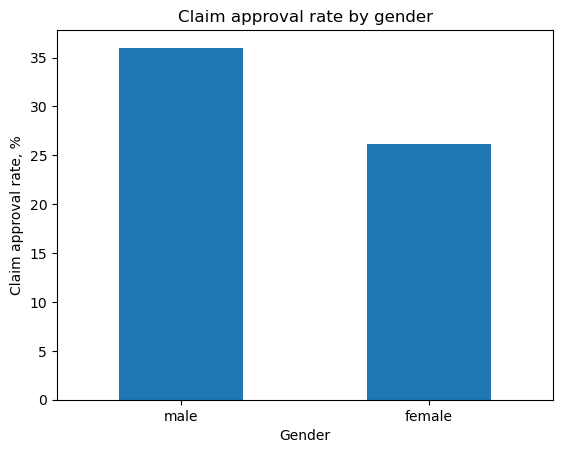

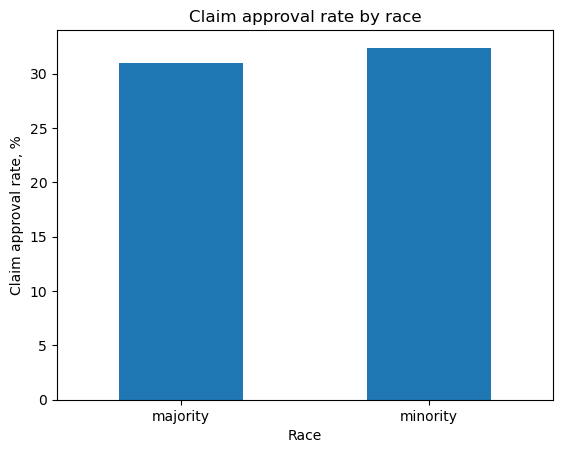

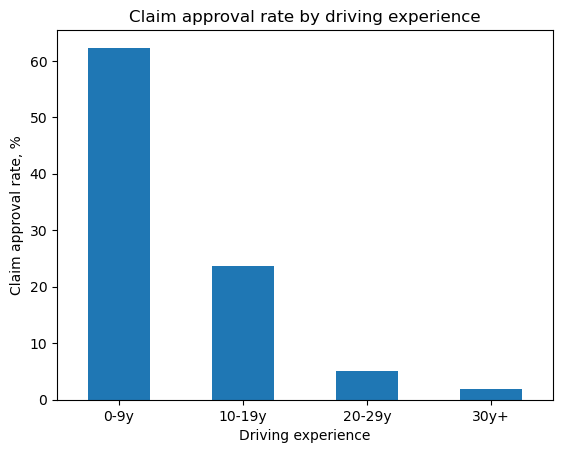

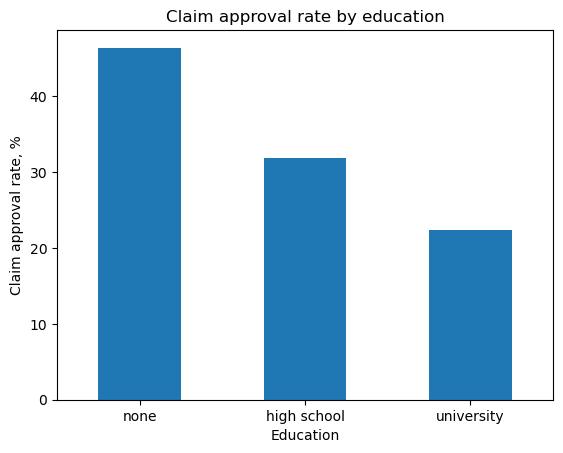

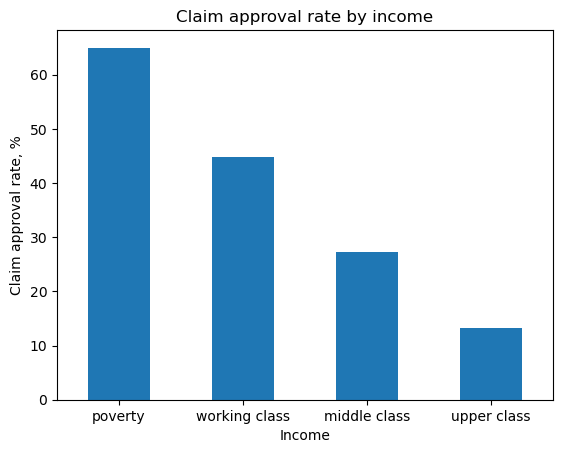

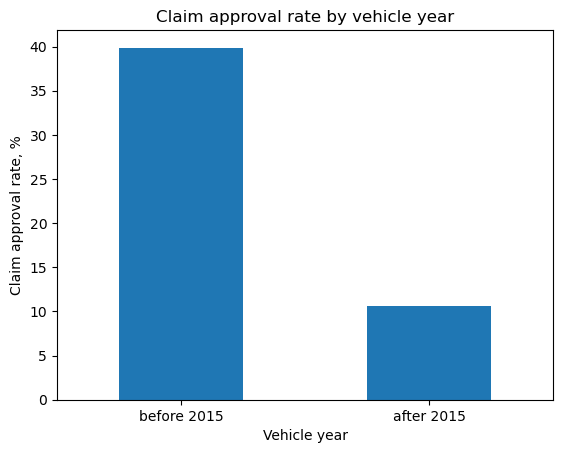

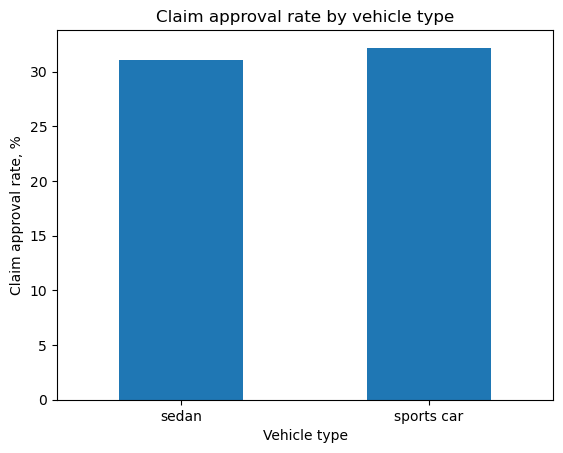

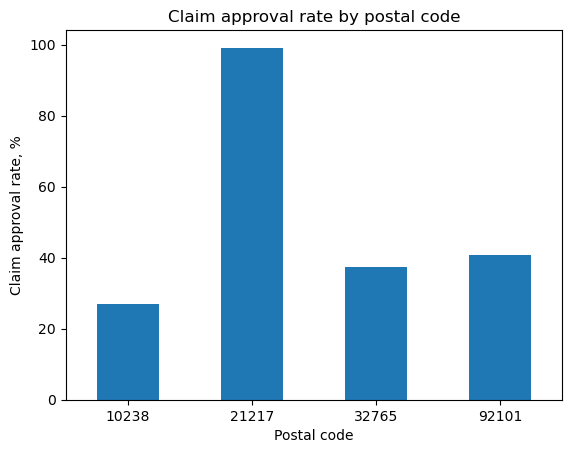

In [155]:
for col_name in columns_with_unique_values.keys():

    col_title = ' '.join(col_name.lower().split('_'))

    series = pd.Series()
    for group in columns_with_unique_values[col_name]:

        approved = len(claims.query(f'{col_name} == "{group}" and OUTCOME == 1'))
        overall = len(claims.query(f'{col_name} == "{group}"'))
        approval_rate = approved / overall * 100
        
        series.loc[group] = approval_rate
    
    plt.figure()
    fig = series.plot(kind='bar', title=f'Claim approval rate by {col_title}', xlabel=col_title.capitalize(), ylabel='Claim approval rate, %')
    fig.set_xticklabels(series.index, rotation=0)
    plt.show()